In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import dataset
shellfish_landings = pd.read_csv('ca_shellfish_landings.csv')

In [3]:

shellfish_landings.head()

,time,year,fish,port,landings
0,1928-01-16T00:00:00Z,1928,"abalone, black",All,0
1,1928-02-16T00:00:00Z,1928,"abalone, black",All,0
2,1928-03-16T00:00:00Z,1928,"abalone, black",All,0
3,1928-04-16T00:00:00Z,1928,"abalone, black",All,0
4,1928-05-16T00:00:00Z,1928,"abalone, black",All,0


In [4]:
# Rename the 'fish' column as 'species'
shellfish_landings = shellfish_landings.rename(columns={'fish':'species'})

In [5]:
shellfish_landings.dtypes

time        object
year         int64
species     object
port        object
landings     int64
dtype: object

In [6]:
# Convert the 'time' column to the pandas datatime format, handle UTC timezone suffix
shellfish_landings['time'] = pd.to_datetime(shellfish_landings['time'], utc=True)

In [7]:
shellfish_landings.dtypes

time        datetime64[ns, UTC]
year                      int64
species                  object
port                     object
landings                  int64
dtype: object

In [8]:
# Remove rows/observations where there is 0 or no landings recorded
shellfish_landings = shellfish_landings[shellfish_landings['landings'] != 0]

In [9]:
# Save DataFrame as a .csv with just the observations containing a landing weight
# shellfish_landings.to_csv('shellfish_landings_clean.csv', index=False)

In [10]:
# Randomly sample 500 rows for a smaller quick view dataset
shellfish_landings_snippet = shellfish_landings.sample(n=500, random_state=42)  # random_state for reproducibility

# Save quick view snippet to CSV
# shellfish_landings_snippet.to_csv('shellfish_landings_snippet.csv', index=False)

=== Summary by Species (Top 10) ===
                       Total_Landings  Average_Landings  Number_of_Records
species                                                                   
crab, dungeness            1198246546         353152.53               3393
shrimp, pacific ocean       462642214         396097.79               1168
abalone, unspecified        295265720         132465.55               2229
oyster, giant pacific       207578578         105369.84               1970
crab, rock                   85814116          24193.44               3547
shrimp, unspecified          70016318          62964.31               1112
abalone, red                 23298592          18359.80               1269
abalone, black               20892706          23369.92                894
prawn, ridgeback             19636378          22038.58                891
oyster, eastern              16698674          13915.56               1200

=== Summary by Port ===
               Total_Landings  Average_

/var/folders/38/c4q60gd93n53zp9cy3yqx8740000gn/T/ipykernel_51143/3886381718.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_totals = shellfish_landings.set_index('time').resample('M')['landings'].sum()


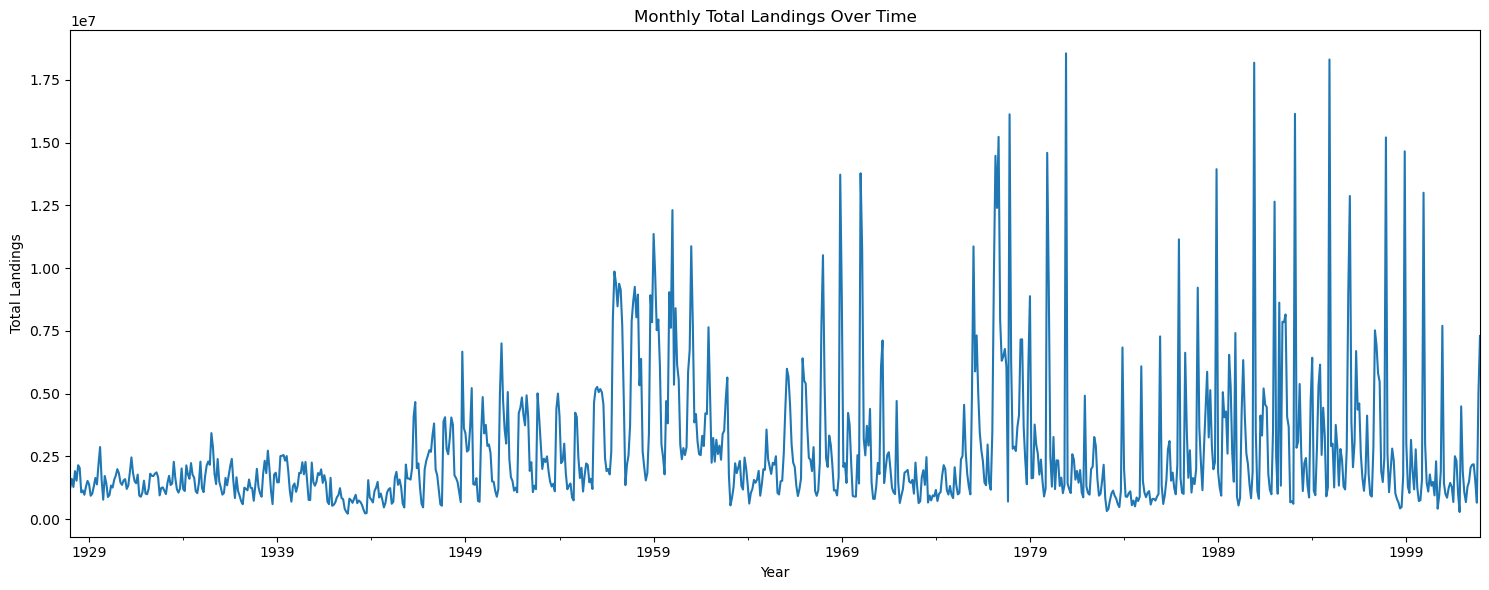

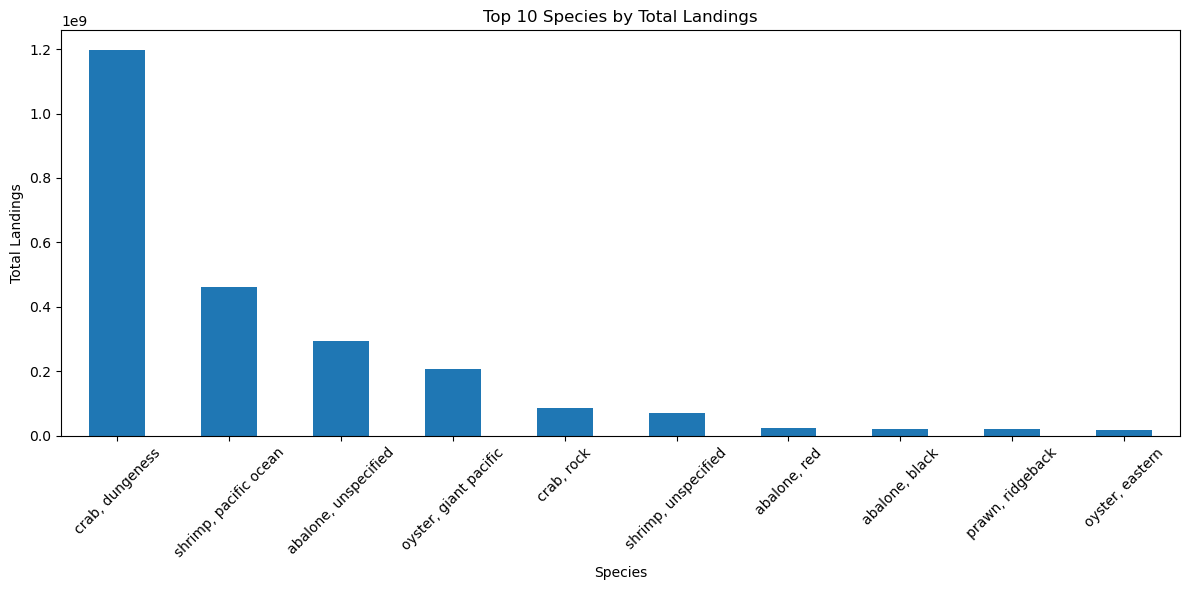

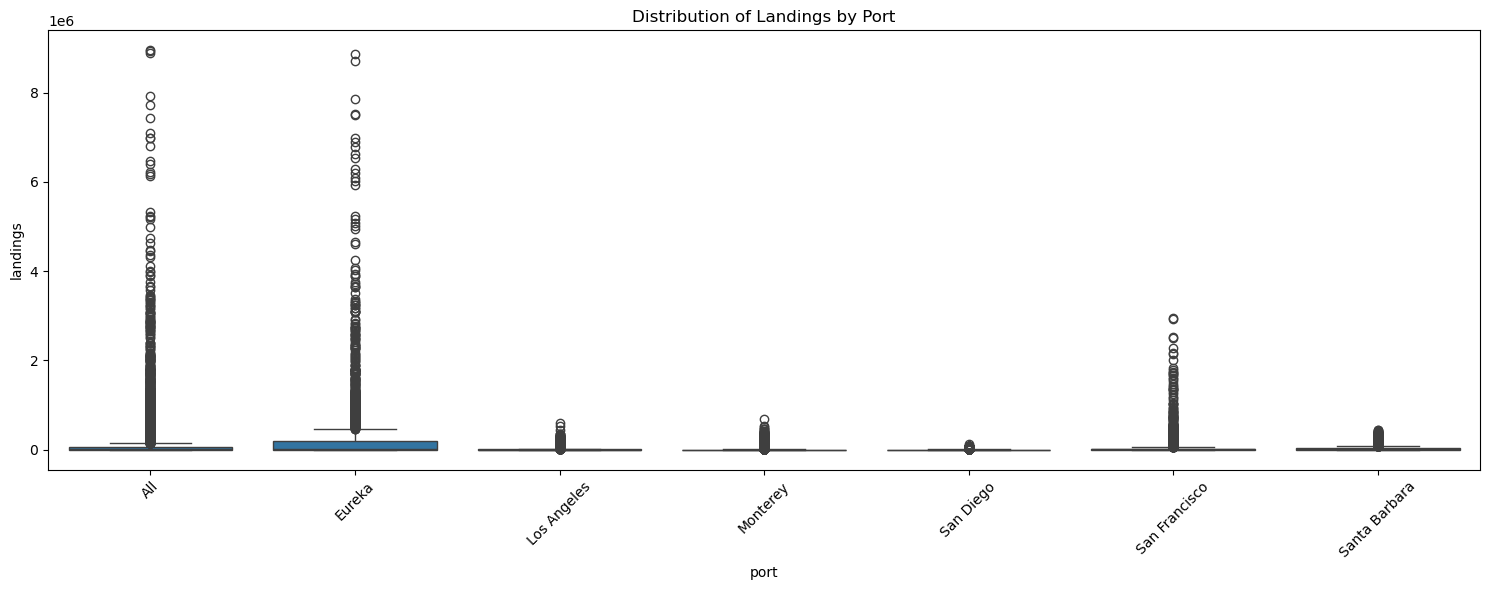

In [11]:
# 1. Summary by species
species_summary = shellfish_landings.groupby('species').agg({
    'landings': ['sum', 'mean', 'count']
}).round(2)
species_summary.columns = ['Total_Landings', 'Average_Landings', 'Number_of_Records']
species_summary = species_summary.sort_values('Total_Landings', ascending=False)

# 2. Summary by port
port_summary = shellfish_landings.groupby('port').agg({
    'landings': ['sum', 'mean', 'count']
}).round(2)
port_summary.columns = ['Total_Landings', 'Average_Landings', 'Number_of_Records']
port_summary = port_summary.sort_values('Total_Landings', ascending=False)

# 3. Summary by year
year_summary = shellfish_landings.groupby('year').agg({
    'landings': ['sum', 'mean', 'count']
}).round(2)
year_summary.columns = ['Total_Landings', 'Average_Landings', 'Number_of_Records']
year_summary = year_summary.sort_values('year')

# Print summaries
print("=== Summary by Species (Top 10) ===")
print(species_summary.head(10))
print("\n=== Summary by Port ===")
print(port_summary)
print("\n=== Summary by Year (First 10 years) ===")
print(year_summary.head(10))

# Basic stats
print("\n=== Basic Statistics for Landings ===")
print(shellfish_landings['landings'].describe().round(2))

# Time series analysis - monthly totals
monthly_totals = shellfish_landings.set_index('time').resample('M')['landings'].sum()

# 1. Time series plot
plt.figure(figsize=(15, 6))
monthly_totals.plot(title='Monthly Total Landings Over Time')
plt.xlabel('Year')
plt.ylabel('Total Landings')
plt.tight_layout()
plt.show()

# 2. Top 10 species
plt.figure(figsize=(12, 6))
species_summary['Total_Landings'].head(10).plot(kind='bar')
plt.title('Top 10 Species by Total Landings')
plt.xlabel('Species')
plt.ylabel('Total Landings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Boxplot of landings by port
plt.figure(figsize=(15, 6))
sns.boxplot(data=shellfish_landings, x='port', y='landings')
plt.title('Distribution of Landings by Port')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:

# Seasonal patterns
monthly_patterns = shellfish_landings.groupby(shellfish_landings['time'].dt.month)['landings'].mean().round(2)
print("\n=== Average Landings by Month ===")
print(monthly_patterns)

# Species diversity by port
species_diversity = shellfish_landings.groupby('port')['species'].nunique().sort_values(ascending=False)
print("\n=== Number of Species by Port ===")
print(species_diversity)


=== Average Landings by Month ===
time
1     111632.00
2      96001.23
3      67994.81
4      81860.99
5      85677.09
6      70393.30
7      69923.81
8      74690.69
9      50558.90
10     42663.71
11     71075.77
12    162250.53
Name: landings, dtype: float64

=== Number of Species by Port ===
port
All              38
San Francisco    32
Santa Barbara    32
Los Angeles      31
San Diego        27
Monterey         25
Eureka           23
Name: species, dtype: int64


In [13]:
# Specify more common fisheries for investigation - 
abalone = [
    "abalone, black",
    "abalone, flat",
    "abalone, green",
    "abalone, pink",
    "abalone, white",
    "abalone, pinto",
    "abalone, red",
    "abalone, threaded",
    "abalone, unspecified"
]

clams = [
    "clam, gaper",
    "clam, california jackknife",
    "clam, native littleneck",
    "clam, pismo",
    "clam, purple",
    "clam, rosy razor",
    "clam, common washington",
    "clam, unspecified"
]

crabs = [
    "crab, dungeness",
    "crab, rock",
    "crab, brown rock",
    "crab, red rock",
    "crab, yellow rock",
    "crab, king",
    "crab, spider",
    "crab, tanner"
]

oysters = [
    "oyster, california",
    "oyster, eastern",
    "oyster, european flat",
    "oyster, giant pacific",
    "oyster, unspecified"
]

shrimp_prawn = [
    "shrimp, pacific ocean",
    "shrimp, bay",
    "shrimp, red rock",
    "prawn, ridgeback",
    "prawn, spotted",
    "prawn, golden",
    "shrimp, unspecified",
    "prawn, unspecified"
]

In [14]:
# Create a function to categorize species into groups
def get_species_group(species):
   if species in abalone:
       return 'Abalone'
   elif species in clams:
       return 'Clams'
   elif species in crabs:
       return 'Crabs'
   elif species in oysters:
       return 'Oysters'
   elif species in shrimp_prawn:
       return 'Shrimp & Prawns'
   else:
       return 'Other'

# Add species group column
shellfish_landings['species_group'] = shellfish_landings['species'].apply(get_species_group)

# Create summary by species group
species_group_summary = shellfish_landings.groupby('species_group').agg({
   'landings': ['sum', 'mean', 'count']
}).round(2)
species_group_summary.columns = ['Total_Landings', 'Average_Landings', 'Number_of_Records']
species_group_summary = species_group_summary.sort_values('Total_Landings', ascending=False)

# Summary by species group and port
group_port_summary = shellfish_landings.pivot_table(
   values='landings',
   index='port',
   columns='species_group',
   aggfunc='sum'
).round(2).fillna(0)

# Summary by species group and year
group_year_summary = shellfish_landings.pivot_table(
   values='landings',
   index='year',
   columns='species_group',
   aggfunc='sum'
).round(2).fillna(0)


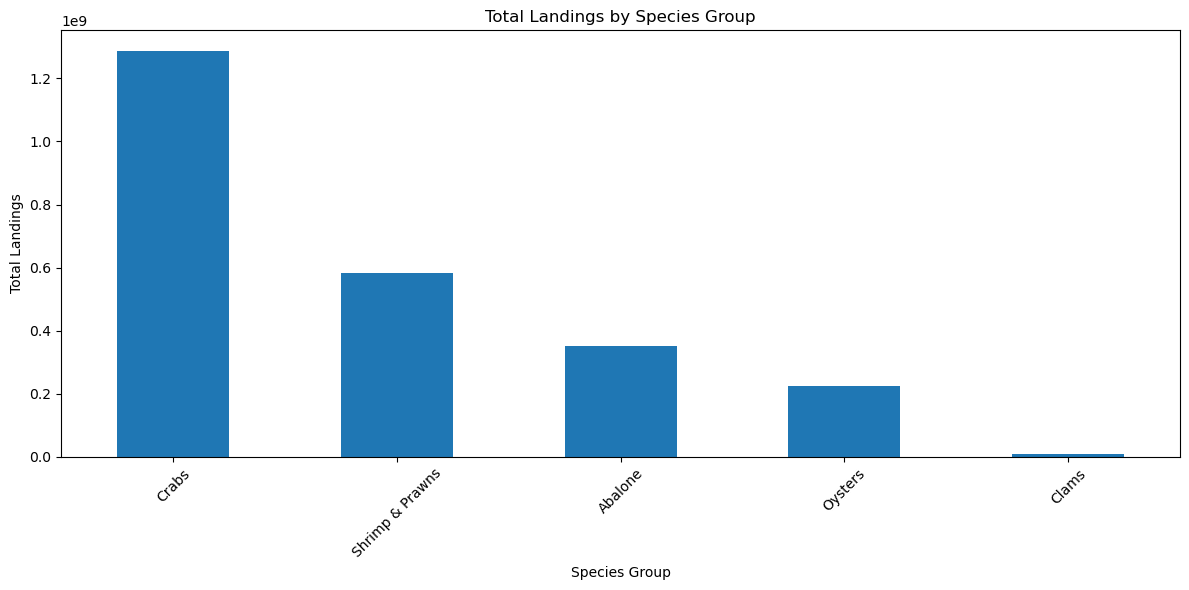

<Figure size 1500x600 with 0 Axes>

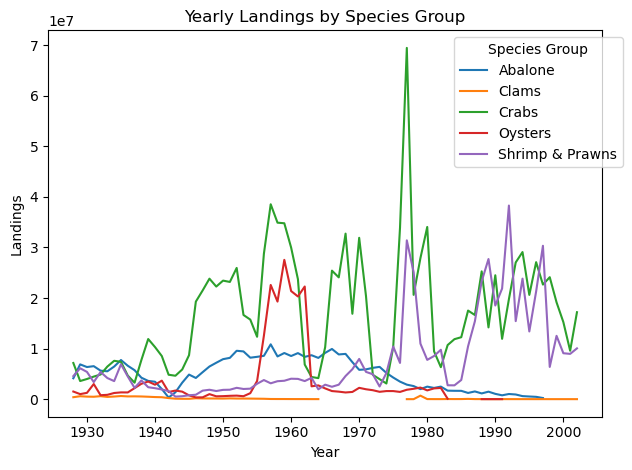

<Figure size 1500x600 with 0 Axes>

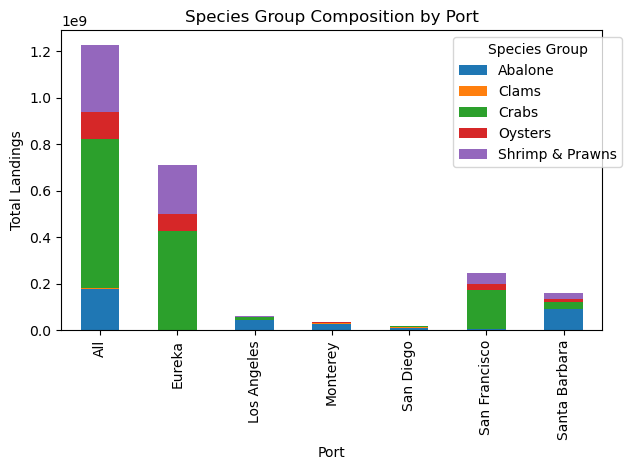

In [15]:
# Bar plot of total landings by species group
plt.figure(figsize=(12, 6))
species_group_summary['Total_Landings'].plot(kind='bar')
plt.title('Total Landings by Species Group')
plt.xlabel('Species Group')
plt.ylabel('Total Landings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Time series by species group
yearly_group_totals = shellfish_landings.groupby(['year', 'species_group'])['landings'].sum().unstack()
plt.figure(figsize=(15, 6))
yearly_group_totals.plot(title='Yearly Landings by Species Group')
plt.xlabel('Year')
plt.ylabel('Landings')
plt.legend(title='Species Group', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

# Stacked bar plot of species group composition by port
plt.figure(figsize=(15, 6))
group_port_summary.plot(kind='bar', stacked=True)
plt.title('Species Group Composition by Port')
plt.xlabel('Port')
plt.ylabel('Total Landings')
plt.legend(title='Species Group', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()
